In [2]:
%config InlineBackend.figure_formats = ['svg']
import sys
sys.path.insert(1, '../')

import matplotlib.pyplot as plt
from os import path

from deployment_instance.Result import ExperimentResult
from src.ingest_data import ingest_experiment_results
from src.query_data import get_exfiltration_time_df, get_data_exfiltration_cdf, total_control_host_capture_times
from statistics import mean
import seaborn as sns
# set seaborn font size
sns.set_theme(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})

import pandas as pd

In [5]:
# Equifax d10_h0
equifax_standalone_d10_h0 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/equifax/equifax_standalone_d10_h0'))
# dfs_standalone_d10_h0 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/dfs/dfs_standalone_d10_h0'))
targeted_standalone_d10_h0 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/targeted/targeted_standalone_d10_h0'))
# persistentdfs_standalone_d10_h0 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/persistent_dfs/persistentdfs_standalone_d10_h0'))
darkside_standalone_d10_h0 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/darkside/darkside_standalone_d10_h0'))

equifax_standalone_d10_data = {}
equifax_standalone_d10_data.update(equifax_standalone_d10_h0)
# equifax_standalone_d10_data.update(dfs_standalone_d10_h0)
equifax_standalone_d10_data.update(targeted_standalone_d10_h0)
# equifax_standalone_d10_data.update(persistentdfs_standalone_d10_h0) 
equifax_standalone_d10_data.update(darkside_standalone_d10_h0)

# Equifax d10_h50
equifax_standalone_d10_h50 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/equifax/equifax_standalone_d10_h50'))
dfs_standalone_d10_h50 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/dfs/dfs_standalone_d10_h50'))
targeted_standalone_d10_h50 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/targeted/targeted_standalone_d10_h50'))
persistentdfs_standalone_d10_h50 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/persistent_dfs/persistentdfs_standalone_d10_h50'))
darkside_standalone_d10_h50 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/darkside/darkside_standalone_d10_h50'))

equifax_standalone_d10_h50_data = {}
equifax_standalone_d10_h50_data.update(equifax_standalone_d10_h50)
equifax_standalone_d10_h50_data.update(dfs_standalone_d10_h50)
equifax_standalone_d10_h50_data.update(targeted_standalone_d10_h50)
equifax_standalone_d10_h50_data.update(persistentdfs_standalone_d10_h50)
equifax_standalone_d10_h50_data.update(darkside_standalone_d10_h50)

# Equifax layered
equifax_layered = ingest_experiment_results(path.join('data/EquifaxLarge/layered/equifax/baseline_layered_d10_h50'))
dfs_layered = ingest_experiment_results(path.join('data/EquifaxLarge/layered/dfs/dfs_layered_d10_h50'))
# targeted_layered = ingest_experiment_results(path.join('data/EquifaxLarge/layered/targeted/targeted_layered_d10_h50'))
persistentdfs_layered = ingest_experiment_results(path.join('data/EquifaxLarge/layered/persistent_dfs/persistentdfs_layered_d10_h50'))
darkside_layered = ingest_experiment_results(path.join('data/EquifaxLarge/layered/darkside/darkside_layered_d10_h50'))

equifax_layered_data = {}
equifax_layered_data.update(equifax_layered)
equifax_layered_data.update(dfs_layered)
# equifax_layered_data.update(targeted_layered)
equifax_layered_data.update(persistentdfs_layered)
equifax_layered_data.update(darkside_layered)

# Equifax reactive simple
equifax_reactive_simple = ingest_experiment_results(path.join('data/EquifaxLarge/reactive/equifax/baseline_reactiveStandalone_d10_h0'))
dfs_reactive_simple = ingest_experiment_results(path.join('data/EquifaxLarge/reactive/dfs/dfs_reactiveSimple'))
targeted_reactive_simple = ingest_experiment_results(path.join('data/EquifaxLarge/reactive/targeted/targeted_reactiveSimple'))
persistentdfs_reactive_simple = ingest_experiment_results(path.join('data/EquifaxLarge/reactive/persistent_dfs/persistentdfs_reactiveSimple'))
darkside_reactive_simple = ingest_experiment_results(path.join('data/EquifaxLarge/reactive/darkside/darkside_reactiveSimple'))

equifax_reactive_simple_data = {}
equifax_reactive_simple_data.update(equifax_reactive_simple)
equifax_reactive_simple_data.update(dfs_reactive_simple)
equifax_reactive_simple_data.update(targeted_reactive_simple)
equifax_reactive_simple_data.update(persistentdfs_reactive_simple)
equifax_reactive_simple_data.update(darkside_reactive_simple)


In [9]:
equifax_standalone_d10_data_times = get_exfiltration_time_df(equifax_standalone_d10_data, 48, 'basic_honeypot')
equifax_standalone_d10_h50_data_times = get_exfiltration_time_df(equifax_standalone_d10_h50_data, 48, 'mixed_deception')
equifax_layered_data_times = get_exfiltration_time_df(equifax_layered_data, 48, 'layered')
equifax_reactive_simple_data_times = get_exfiltration_time_df(equifax_reactive_simple_data, 48, 'reactive_simple')


# Merge dfs into 1 df
equifax_data = pd.concat([equifax_standalone_d10_data_times, equifax_standalone_d10_h50_data_times, equifax_layered_data_times, equifax_reactive_simple_data_times])
equifax_data.columns

Index(['experiment', 'defender', 'attacker', 'experiment_num',
       'time_exfiltrated', 'time_per_file', 'files_exfiltrated',
       'percent_files_exfiltrated'],
      dtype='object')

In [11]:
equifax_data_agg = (
    equifax_data.groupby('experiment')
    .agg({'percent_files_exfiltrated': 'median', 'time_exfiltrated': 'median', 'defender': 'first', 'attacker': 'first'})
    .reset_index()
)

<Axes: xlabel='defender', ylabel='time_exfiltrated'>

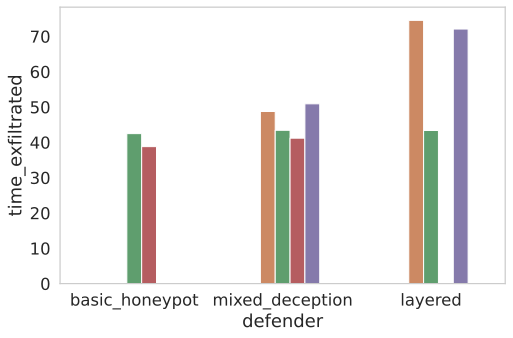

In [25]:
# Bar plot
plt.figure(figsize=(8, 5))
defender_order = ['basic_honeypot', 'mixed_deception', 'layered', 'reactive_simple']
attacker_order = ['equifax', 'network_DFS', 'darkside', 'targeted', 'persistent_dfs_planner']
sns.barplot(x='defender', y='time_exfiltrated', hue='attacker', data=equifax_data_agg,
            order=defender_order, hue_order=attacker_order,
            width=.5, legend=False)

In [26]:
# ICS d10_h0
equifax_standalone_d10_h0 = ingest_experiment_results(path.join('data/ICS/standalone/equifax/equifax_standalone_d10_h0'))
dfs_standalone_d10_h0 = ingest_experiment_results(path.join('data/ICS/standalone/dfs/dfs_standalone_d10_h0'))
targeted_standalone_d10_h0 = ingest_experiment_results(path.join('data/ICS/standalone/targeted/targeted_standalone_d10_h0'))
persistentdfs_standalone_d10_h0 = ingest_experiment_results(path.join('data/ICS/standalone/persistent_dfs/persistentdfs_standalone_d10_h0'))
darkside_standalone_d10_h0 = ingest_experiment_results(path.join('data/ICS/standalone/darkside/darkside_standalone_d10_h0'))

ics_standalone_d10_h0_data = {}
ics_standalone_d10_h0_data.update(equifax_standalone_d10_h0)
ics_standalone_d10_h0_data.update(dfs_standalone_d10_h0)
ics_standalone_d10_h0_data.update(targeted_standalone_d10_h0)
ics_standalone_d10_h0_data.update(persistentdfs_standalone_d10_h0)
ics_standalone_d10_h0_data.update(darkside_standalone_d10_h0)

# ICS d10_h50
equifax_standalone_d10_h50 = ingest_experiment_results(path.join('data/ICS/standalone/equifax/equifax_standalone_d10_h50'))
dfs_standalone_d10_h50 = ingest_experiment_results(path.join('data/ICS/standalone/dfs/dfs_standalone_d10_h50'))
targeted_standalone_d10_h50 = ingest_experiment_results(path.join('data/ICS/standalone/targeted/targeted_standalone_d10_h50'))
persistentdfs_standalone_d10_h50 = ingest_experiment_results(path.join('data/ICS/standalone/persistent_dfs/persistentdfs_standalone_d10_h50'))
darkside_standalone_d10_h50 = ingest_experiment_results(path.join('data/ICS/standalone/darkside/darkside_standalone_d10_h50'))

ics_standalone_d10_h50_data = {}
ics_standalone_d10_h50_data.update(equifax_standalone_d10_h50)
ics_standalone_d10_h50_data.update(dfs_standalone_d10_h50)
ics_standalone_d10_h50_data.update(targeted_standalone_d10_h50)
ics_standalone_d10_h50_data.update(persistentdfs_standalone_d10_h50)
ics_standalone_d10_h50_data.update(darkside_standalone_d10_h50)

# ICS Layered
equifax_layered = ingest_experiment_results(path.join('data/ICS/layered/equifax/equifax_layered_d10_h50'))
dfs_layered = ingest_experiment_results(path.join('data/ICS/layered/dfs/dfs_layered_d10_h50'))
targeted_layered = ingest_experiment_results(path.join('data/ICS/layered/targeted/targeted_layered_d10_h50'))
persistentdfs_layered = ingest_experiment_results(path.join('data/ICS/layered/persistent_dfs/persistentdfs_layered_d10_h50'))
darkside_layered = ingest_experiment_results(path.join('data/ICS/layered/darkside/darkside_layered_d10_h50'))

ics_layered_data = {}
ics_layered_data.update(equifax_layered)
ics_layered_data.update(dfs_layered)
ics_layered_data.update(targeted_layered)
ics_layered_data.update(persistentdfs_layered)
ics_layered_data.update(darkside_layered)

# ICS Reactive
equifax_reactive = ingest_experiment_results(path.join('data/ICS/reactive/equifax/equifax_reactiveSimple'))
dfs_reactive = ingest_experiment_results(path.join('data/ICS/reactive/dfs/dfs_reactiveSimple'))
targeted_reactive = ingest_experiment_results(path.join('data/ICS/reactive/targeted/targeted_reactiveSimple'))
persistentdfs_reactive = ingest_experiment_results(path.join('data/ICS/reactive/persistent_dfs/persistentdfs_reactiveSimple'))
darkside_reactive = ingest_experiment_results(path.join('data/ICS/reactive/darkside/darkside_reactiveSimple'))

ics_reactive_data = {}
ics_reactive_data.update(equifax_reactive)
ics_reactive_data.update(dfs_reactive)
ics_reactive_data.update(targeted_reactive)
ics_reactive_data.update(persistentdfs_reactive)
ics_reactive_data.update(darkside_reactive)


# ICS Mislead
equifax_mislead = ingest_experiment_results(path.join('data/ICS/mislead/equifax_mislead'))
dfs_mislead = ingest_experiment_results(path.join('data/ICS/mislead/dfs_mislead'))
targeted_mislead = ingest_experiment_results(path.join('data/ICS/mislead/targeted_mislead'))
persistentdfs_mislead = ingest_experiment_results(path.join('data/ICS/mislead/persistentdfs_mislead'))
darkside_mislead = ingest_experiment_results(path.join('data/ICS/mislead/darkside_mislead'))

ics_mislead_data = {}
ics_mislead_data.update(equifax_mislead)
ics_mislead_data.update(dfs_mislead)
ics_mislead_data.update(targeted_mislead)
ics_mislead_data.update(persistentdfs_mislead)
ics_mislead_data.update(darkside_mislead)


In [ ]:
ics_standalone_d10_data_times = total_control_host_capture_times(ics_standalone_d10_h0_data, 'ics')

# equifax_reactive_simple_data_times = get_exfiltration_time_df(equifax_reactive_simple, 48, 'basic_honeypot')


# Merge dfs into 1 df
equifax_data = pd.concat([equifax_standalone_d10_data_times, equifax_standalone_d10_h50_data_times, equifax_layered_data_times])

In [6]:
ics_standalone_d10_data_times = total_control_host_capture_times(ics_standalone_d10_h0_data, 'ics')
ics_standalone_d10_data_times.groupby('experiment').agg({
    'percent_hosts_infected': ['mean'],
    'time_taken': ['median', 'std']
    })

percent_hosts_infected time_taken          
                                                  mean     median       std
experiment                                                                 
darkside_standalone_d10_h0                       100.0  13.576007  0.785140
dfs_standalone_d10_h0                            100.0  13.924479  1.286766
equifax_standalone_d10_h0                          0.0   0.000000  0.000000
persistentdfs_standalone_d10_h0                  100.0  12.322814  0.364086
targeted_standalone_d10_h0                       100.0  15.049992  3.917956

In [7]:
ics_standalone_d10_h50_data_times = total_control_host_capture_times(ics_standalone_d10_h50_data, 'ics')
ics_standalone_d10_h50_data_times.groupby('experiment').agg({
    'percent_hosts_infected': ['mean'],
    'time_taken': ['median', 'std']
    })

percent_hosts_infected time_taken          
                                                   mean     median       std
experiment                                                                  
Baseline                                          100.0  16.430956  1.772524
darkside_standalone_d10_h50                       100.0  16.200625  1.286272
equifax_standalone_d10_h50                          0.0   0.000000  0.000000
persistentdfs_standalone_d10_h50                  100.0  18.910009  0.715845
targeted_standalone_d10_h50                       100.0  14.654171  8.507645

In [8]:
ics_mislead_data_df = total_control_host_capture_times(ics_mislead_data, 'ics')
ics_mislead_data_df.groupby('experiment').agg({
    'percent_hosts_infected': ['mean'],
    'time_taken': ['median', 'std']
    })

percent_hosts_infected time_taken          
                                                mean     median       std
experiment                                                               
darkside_layered_d10_h50                       100.0  13.400931  3.766399
dfs_layered_d10_h50                            100.0  19.647871  0.956958
equifax_layered_d10_h50                          0.0   0.000000  0.000000
persistentdfs_layered_d10_h50                  100.0  19.549517  1.353136
targeted_mislead                               100.0  19.195060  1.008180

In [9]:
ics_layered_data_df = total_control_host_capture_times(ics_layered_data, 'ics')
ics_layered_data_df.groupby('experiment').agg({
    'percent_hosts_infected': ['mean'],
    'time_taken': ['median', 'std']
    })

percent_hosts_infected time_taken          
                                                mean     median       std
experiment                                                               
Baseline                                       100.0  13.561076  1.664842
darkside_layered_d10_h50                       100.0  15.608131  1.345889
dfs_layered_d10_h50                            100.0  20.712327  1.488304
equifax_layered_d10_h50                          0.0   0.000000  0.000000
persistentdfs_layered_d10_h50                  100.0  17.362173  2.868329
targeted_layered_d10_h50                       100.0  13.513234  1.737048

In [15]:
ics_reactive_data_df = total_control_host_capture_times(ics_reactive_data, 'ics')
ics_reactive_data_df.groupby('experiment').agg({
    'percent_hosts_infected': ['mean', 'median'],
    'time_taken': ['median', 'std']
    })

percent_hosts_infected        time_taken  \
                                               mean median     median   
experiment                                                              
darkside_reactiveSimple                        40.0    0.0   0.000000   
dfs_reactiveSimple                             60.0  100.0  11.316369   
equifax_reactiveSimple                         10.0    0.0   0.000000   
persistentdfs_reactiveSimple                   20.0    0.0   0.000000   

                                         
                                    std  
experiment                               
darkside_reactiveSimple       12.688971  
dfs_reactiveSimple             6.745753  
equifax_reactiveSimple         3.609485  
persistentdfs_reactiveSimple   4.486224